# Continued here

### While running the model in the previous file, Some environment related errors were faced and this file was used to train the model in an isolated environment and continued with the remaining task

In [98]:
import os
import pandas as pd
import supervision as sv
import numpy as np
import rasterio as rs
import random
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
%matplotlib inline
from ultralytics import YOLO

In [64]:
# Path to the labels directory in validation set
label_dir = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/labels/val"

# Iterate through each label file in the directory
for filename in os.listdir(label_dir):
    # Skip hidden files (like .ipynb_checkpoints)
    if filename.startswith('.'):
        continue
    
    file_path = os.path.join(label_dir, filename)
    
    # Open the label file for reading
    with open(file_path, 'r') as file:
        # Read all lines (each line represents a label)
        lines = file.readlines()
    
    # Open the label file for writing (to overwrite it)
    with open(file_path, 'w') as file:
        for line in lines:
            # Split the line into values (category and coordinates)
            values = line.strip().split()
            
            # Change the category to 0 (if it's not already 0)
            values[0] = '0'
            
            # Write the modified line back to the file
            file.write(" ".join(values) + '\n')

    print(f"Updated labels in {filename}")
    
print("✅ All categories have been changed to 0.")


Updated labels in solarpanels_native_1__x0_0_y0_7840_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_10153_y0_11089_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_10313_y0_12985_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1052_y0_7606_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_12068_y0_14021_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1262_y0_6520_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1299_y0_6081_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_13201_y0_14023_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_13473_y0_14904_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1498_y0_9554_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1536_y0_6546_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1568_y0_9274_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1762_y0_7503_dxdy_416.txt
Updated labels in solarpanels_native_1__x0_1808_y0_6881_dxdy_416.txt
Updated labels in solarpane

## Loading previously trained model

In [65]:
model = YOLO("runs/detect/train/weights/best.pt")
model.info()

Model summary: 225 layers, 3,011,238 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011238, 0, 8.1952256)

In [ ]:
## if want to train model run this cell
model.train(data="C:/Users/samra/OneDrive/Desktop/SRIP task/data/data.yaml", epochs=5, imgsz=416, batch=8, device="cpu")

New https://pypi.org/project/ultralytics/8.3.76 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.12.9 torch-2.3.1 CPU (13th Gen Intel Core(TM) i5-13450HX)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/samra/OneDrive/Desktop/SRIP task/data/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning C:\Users\samra\OneDrive\Desktop\SRIP task\data\labels\train.cache... 2033 i
val: Scanning C:\Users\samra\OneDrive\Desktop\SRIP task\data\labels\val.cache... 203 images


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      4.163        4.2      2.753        108        416:   8%|▊      

## Validation of the trained model

In [30]:
dataset_path = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/data.yaml"
YOLO("yolov8n.pt").val(data=dataset_path)

Ultralytics 8.3.75  Python-3.9.21 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13450HX)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning C:\Users\samra\OneDrive\Desktop\SRIP task\data\labels\val.cache... 82 images, 1 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<0


                   all         83        966   0.000673    0.00207   0.000338   0.000203
                person         82        966   0.000673    0.00207   0.000338   0.000203
Speed: 5.2ms preprocess, 152.7ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs\detect\val15


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F4C6FD3DF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

## Plotting Validation Loss

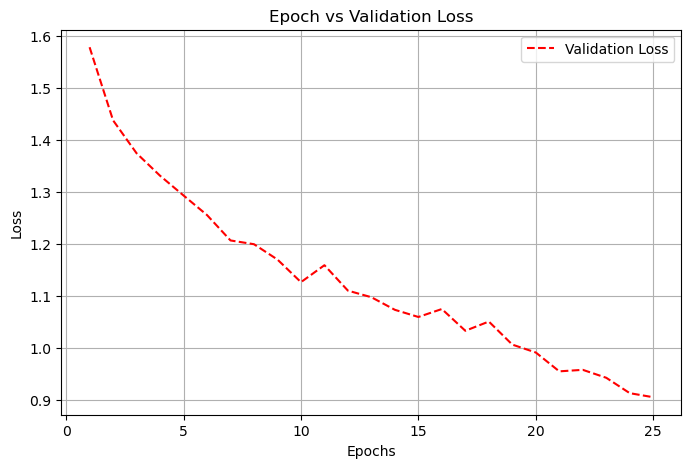

In [66]:
# Load the results.csv file
log_file = "C:/Users/samra/OneDrive/Desktop/SRIP task/scripts/runs/detect/train/results.csv"
df = pd.read_csv(log_file)

# Extract epochs, training loss, and validation loss
epochs = df.index + 1  # Assuming each row corresponds to an epoch
val_loss = df["val/box_loss"]

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_loss, label="Validation Loss", color='red', linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

The Graph is exponentially decreasing indicating it will converge to some value of Loss. It is possible to extend the graph but it would take longer time to compute.

## Defining variables and selecting 4 random images for sample display

In [9]:
# Path to test images
test_img_dir = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/images/test"
label_dir = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/labels/test"
# Get all test images
test_images = [f for f in os.listdir(test_img_dir) if f.endswith(('tif'))]

# Select 4 random test images
random_samples = random.sample(test_images, 4)


## Creating function to plot images with bounding boxes

In [10]:
def visualize_predictions(image_path, model, label_dir):
    # Open image with Rasterio
    with rs.open(image_path) as dataset:
        img = dataset.read([1, 2, 3])  # Read RGB bands
        img = np.moveaxis(img, 0, -1)  # Convert from (bands, H, W) to (H, W, bands)
        height, width, _ = img.shape

    # Set up Matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)

    # Construct label path based on image name
    image_filename = os.path.basename(image_path)
    label_filename = os.path.splitext(image_filename)[0] + ".txt"
    label_path = os.path.join(label_dir, label_filename)

    # Read ground truth labels
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                data = line.strip().split()
                class_id, x, y, w, h = map(float, data)

                # Convert YOLO format (x_center, y_center, width, height) -> (x1, y1, x2, y2)
                x1 = (x - w / 2) * width
                y1 = (y - h / 2) * height
                x2 = (x + w / 2) * width
                y2 = (y + h / 2) * height

                # Draw ground truth box in green
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='green', facecolor='none')
                ax.add_patch(rect)
                ax.text(x1, y1 - 5, f"GT-{int(class_id)}", color='green', fontsize=10, backgroundcolor="white")

    # Run YOLO prediction
    results = model(image_path)[0]

    # Draw Predicted Bounding Boxes
    for result in results.boxes.data:
        x1, y1, x2, y2, conf, cls = result.tolist()

        # Draw predicted bounding box in red
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"Pred-{int(cls)} ({conf:.2f})", color='red', fontsize=10, backgroundcolor="white")

    plt.title("Ground Truth (Green) & Predictions (Red)")
    plt.axis("off")
    plt.show()



image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_2__x0_5216_y0_6485_dxdy_416.tif: 416x416 12 sps, 136.7ms
Speed: 1.7ms preprocess, 136.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)


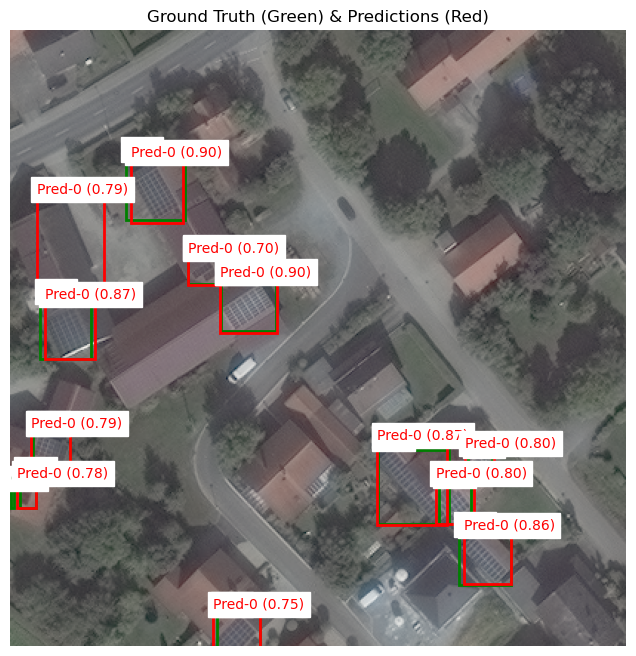


image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_2__x0_2980_y0_5219_dxdy_416.tif: 416x416 37 sps, 171.8ms
Speed: 2.7ms preprocess, 171.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


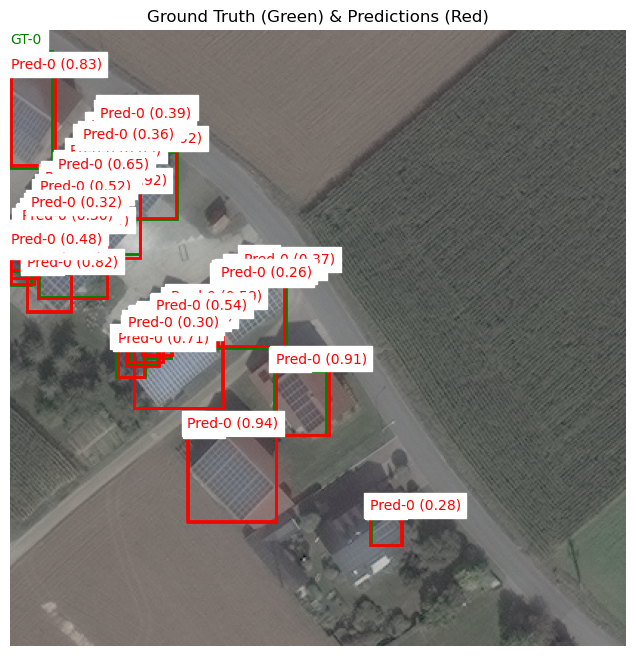


image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_3__x0_1456_y0_6956_dxdy_416.tif: 416x416 2 sps, 182.1ms
Speed: 2.3ms preprocess, 182.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


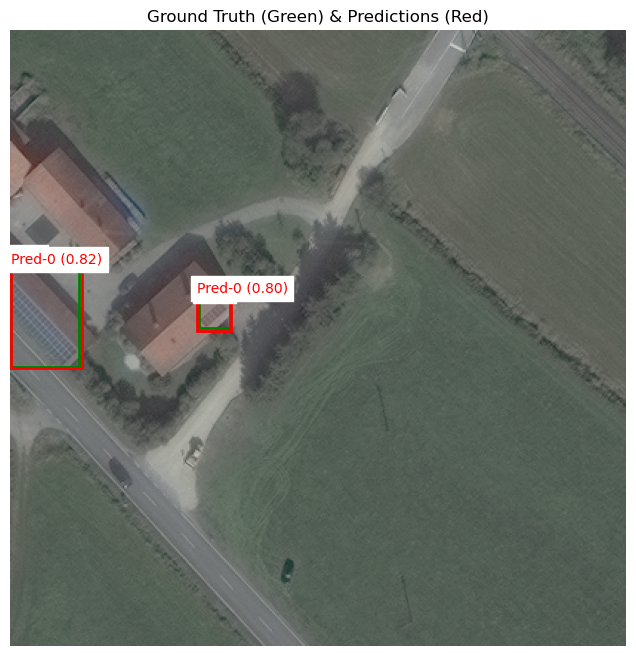


image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_3__x0_5691_y0_11514_dxdy_416.tif: 416x416 2 sps, 156.0ms
Speed: 3.0ms preprocess, 156.0ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)


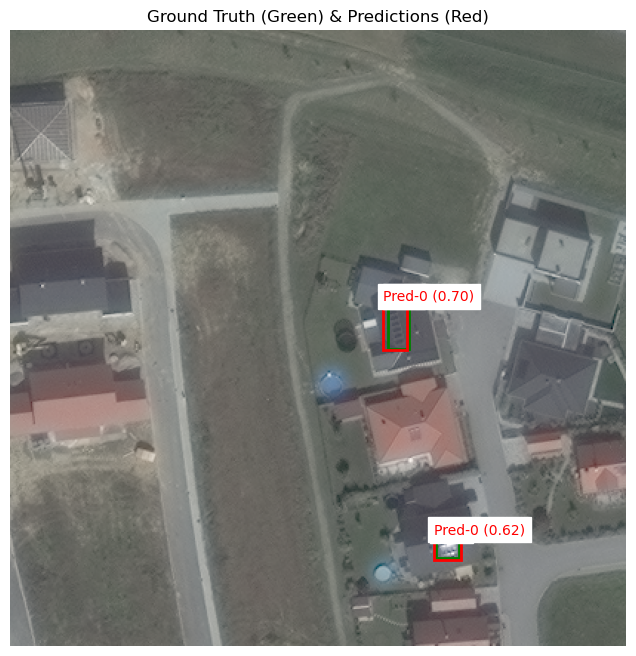

In [11]:
for img_name in random_samples:
    img_path = os.path.join(test_img_dir, img_name)
    visualize_predictions(img_path, model,label_dir)

## Importing Necessary functions from previous files to use here

In [149]:
# for part 1
def IoU(predicted,groundtruth):
    
    pred_box = Polygon([
        (predicted[0], predicted[1]), (predicted[2], predicted[1]),
        (predicted[2], predicted[3]), (predicted[0], predicted[3])
    ])
    
    gt_box = Polygon([
        (groundtruth[0], groundtruth[1]), (groundtruth[2], groundtruth[1]),
        (groundtruth[2], groundtruth[3]), (groundtruth[0], groundtruth[3])
    ])
    
    # Compute intersection and union areas
    intersection_area = pred_box.intersection(gt_box).area
    union_area = pred_box.union(gt_box).area

    # Avoid division by zero
    if union_area == 0:
        return 0.0
    
    # Compute IoU
    iou = intersection_area / union_area
    return iou

# for part 2

def compute_precision_recall(gt_boxes, pred_boxes, pred_scores, iou_threshold=0.5):

    # Sort predicted boxes by confidence score
    sorted_indices = np.argsort(np.concatenate(pred_scores))[::-1]
    pred_boxes = [pred_boxes[i // len(pred_boxes[0])][i % len(pred_boxes[0])] for i in sorted_indices]

    tp = np.zeros(len(pred_boxes))
    fp = np.zeros(len(pred_boxes))
    matched = set()

    for i, pred_box in enumerate(pred_boxes):
        best_iou = 0
        best_gt_idx = -1

        for gt_idx, gt_box_list in enumerate(gt_boxes):
            for gt_box in gt_box_list:
                iou = IoU(pred_box, gt_box)
                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = gt_idx

        if best_iou >= iou_threshold and best_gt_idx not in matched:
            tp[i] = 1  # True Positive
            matched.add(best_gt_idx)
        else:
            fp[i] = 1  # False Positive

    tp_cumsum = np.cumsum(tp)
    fp_cumsum = np.cumsum(fp)

    precisions = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-6)
    recalls = tp_cumsum / len(gt_boxes)

    return recalls, precisions

def voc11(recalls,precisions):
    recalls = np.array(recalls)
    precisions = np.array(precisions)
    
    recall_levels = np.linspace(0, 1, 11)
    
    # Interpolated precision values
    interpolated_precisions = []
    
    for recall_level in recall_levels:
        precisions_above_recall = precisions[recalls >= recall_level]
        if precisions_above_recall.size > 0:
            interpolated_precisions.append(np.max(precisions_above_recall))
        else:
            interpolated_precisions.append(0)
    
    # Compute the mean of the interpolated precision values (11-point interpolation AP)
    ap = np.mean(interpolated_precisions)
    return ap

def coco_ap_101_point_interpolation(recalls, precisions):

    recalls = np.array(recalls)
    precisions = np.array(precisions)
    
    recall_levels = np.linspace(0, 1, 101)
    interpolated_precisions = []
    
    for recall_level in recall_levels:
        precisions_above_recall = precisions[recalls >= recall_level]
        if precisions_above_recall.size > 0:
            interpolated_precisions.append(np.max(precisions_above_recall))
        else:
            interpolated_precisions.append(0)
    
    ap = np.mean(interpolated_precisions)
    return ap

def compute_ap_pr_curve(recalls, precisions):

    return np.trapz(precisions, recalls) 

def compute_ap_50(gt_boxes, pred_boxes, conf_scores, method = "pr-curve"):
    aps = []
    for gt, pred, scores in zip(gt_boxes, pred_boxes, conf_scores):
        ious = np.array([[IoU(p, g) for g in gt] for p in pred])
        
        tp = np.zeros(len(pred))
        fp = np.zeros(len(pred))
        matched = set()
        
        for i, _ in enumerate(pred):
            best_gt_idx = np.argmax(ious[i])
            if ious[i][best_gt_idx] >= 0.5 and best_gt_idx not in matched:
                tp[i] = 1
                matched.add(best_gt_idx)
            else:
                fp[i] = 1
        
        tp_cumsum = np.cumsum(tp)
        fp_cumsum = np.cumsum(fp)
        precisions = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-6)
        recalls = tp_cumsum / len(gt)
        
        if method == "pr-curve":
            ap = compute_ap_pr_curve(recalls, precisions)
        elif method == "voc-11":
            ap = voc11(recalls, precisions)
        elif method == "coco-101":
            ap = coco_ap_101_point_interpolation(recalls, precisions)
        else:
            raise ValueError("Invalid method. Choose from 'pr-curve', 'voc-11', or 'coco-101'.")
        
        aps.append(ap)
    
    return np.mean(aps)

## Defining necessary functions to store bounding box labels and converting yolo to voc format of labels

In [150]:
def load_yolo_annotations(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    
    yolo_boxes = []
    class_ids = []
    
    for line in lines:
        values = list(map(float, line.strip().split()))
        class_id = int(values[0])
        bbox = values[1:]  # (x_center, y_center, width, height)
        
        class_ids.append(class_id)
        yolo_boxes.append(bbox)
    
    return np.array(class_ids), np.array(yolo_boxes)

def yolo_to_voc(yolo_boxes, img_width=416, img_height=416):
    voc_boxes = []
    for box in yolo_boxes:
        x_c, y_c, w, h = box
        x_min = int((x_c - w / 2) * img_width)
        y_min = int((y_c - h / 2) * img_height)
        x_max = int((x_c + w / 2) * img_width)
        y_max = int((y_c + h / 2) * img_height)
        voc_boxes.append([x_min, y_min, x_max, y_max])
    
    return np.array(voc_boxes)


## Creating function to output values of Mean Average Precision using supervision and custom made mAP50

*note : predicted box, label boxes and confidence list was also exported from this function

In [395]:
from supervision.metrics import MeanAveragePrecision

def compute_sv_MAP50(model,label_dir,image_dir):
    voc_boxes_list = []
    voc_id_list = []
    pred_list = []
    conf_list = []
    pred_class_list = []
    output=[]
    for filename in os.listdir(image_dir):
        if filename.startswith('.'):
            continue
        file_path = os.path.join(image_dir, filename)
        file_path1 = os.path.join(label_dir, filename).replace(".tif",".txt")
        class_ids, yolo_boxes = load_yolo_annotations(file_path1)
        voc_boxes = yolo_to_voc(yolo_boxes)
        voc_boxes_list.append(voc_boxes)
        voc_id_list.append(class_ids)
        results=model(file_path)
        pred_boxes = []
        confidences = []
        pred_class_ids = []
        
        for r in results:
            if r.boxes is not None:
                pred_boxes.append(r.boxes.xywh.cpu().numpy().tolist())
                confidences.append(r.boxes.conf.cpu().numpy().tolist()) 
                pred_class_ids.extend(r.boxes.cls.cpu().numpy().astype(int).tolist())
        pred_list.append(pred_boxes)
        pred_class_list.append(pred_class_ids)
        conf_list.append(confidences)
        my_out = compute_ap_50([yolo_boxes],pred_boxes,confidences)
        detections_list = [sv.Detections.from_ultralytics(r) for r in results]
        targets = sv.Detections(xyxy=voc_boxes, class_id=class_ids)
        map_metric = MeanAveragePrecision()
        
        for detect,tar in zip(detections_list,targets):  # Process each detection separately
            map_metric.update(detect, targets)

        map_result= map_metric.update(detect,targets).compute()
        x = float(map_result.map50)
        output.append([x,my_out])
    return output,voc_boxes_list,voc_id_list,pred_list,conf_list,pred_class_list

## Implementing the function to get values for plotting and table

In [396]:
labels = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/labels/test"
img = "C:/Users/samra/OneDrive/Desktop/SRIP task/data/images/test"

ans,voc_boxes_list,voc_id_list,pred_list,conf_list,pred_class_list= compute_sv_MAP50(model,labels,img)


image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_1__x0_0_y0_7303_dxdy_416.tif: 416x416 9 sps, 146.5ms
Speed: 6.6ms preprocess, 146.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_1__x0_1027_y0_7149_dxdy_416.tif: 416x416 10 sps, 164.2ms
Speed: 4.1ms preprocess, 164.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_1__x0_1039_y0_7477_dxdy_416.tif: 416x416 13 sps, 166.8ms
Speed: 1.7ms preprocess, 166.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\samra\OneDrive\Desktop\SRIP task\data\images\test\solarpanels_native_1__x0_10439_y0_13066_dxdy_416.tif: 416x416 9 sps, 164.8ms
Speed: 1.7ms preprocess, 164.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\samra\O

## Plotting values from custom function and supervision's function

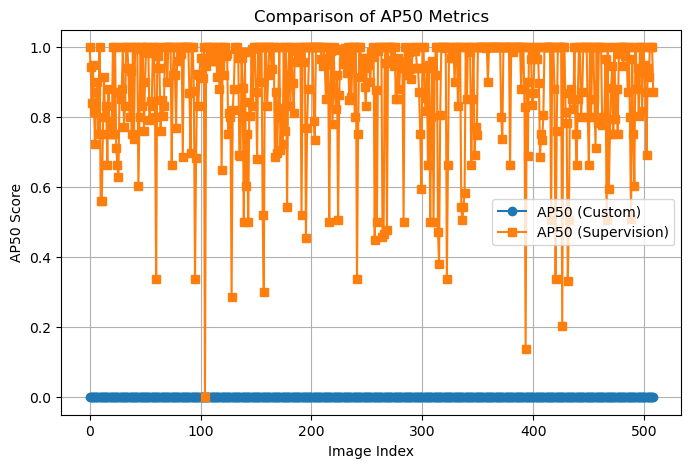

In [250]:
map_metric_values = [x[0] for x in ans]  # Extract map50 values
my_out_values = [x[1] for x in ans]

plt.figure(figsize=(8, 5))
    
plt.plot(my_out_values, label="AP50 (Custom)", marker='o')
plt.plot(map_metric_values, label="AP50 (Supervision)", marker='s')

plt.xlabel("Image Index")
plt.ylabel("AP50 Score")
plt.title("Comparison of AP50 Metrics")
plt.legend()
plt.grid(True)

plt.show()

# The error from Supervision appears to be way more than our trained model, perhaps due to some mismatch of ground truth boxes and predicted boxes

### This cell is just to ensure the list are not over-written every time the coming next cell is executed

In [411]:
preds = pred_list.copy()
class_list = pred_class_list.copy()
conf = conf_list.copy()

## formatting lists to appropriate format for the Supervision's evaluate_detection_batch function

In [412]:
targets = []
for i in range(len(voc_boxes_list)):
    for j in range(len(voc_boxes_list[i])):
        k = voc_boxes_list[i][j].tolist()
        k.append(voc_id_list[i][j])
        targets.append(k)
predicts = []
preds = [item for sublist in preds for item in sublist]
preds = [item for sublist in preds for item in sublist]
print(preds[0])
conf = [item for sublist in conf for item in sublist]
conf = [item for sublist in conf for item in sublist]
print(conf[0])
class_list = [item for sublist in class_list for item in sublist]
print(class_list[0])
for i in range(len(preds)):
    k = preds[i].copy()
    k.append(class_list[i])
    k.append(conf[i])
    predicts.append(k)

print(predicts[0])

[151.61138916015625, 211.028076171875, 40.672607421875, 35.201080322265625]
0.9294962882995605
0
[151.61138916015625, 211.028076171875, 40.672607421875, 35.201080322265625, 0, 0.9294962882995605]


## Creating the precision, recall and F-1 Score Table

In [416]:
# Define thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Dummy prediction and target values
predictions = np.array(predicts)  # List of predicted bounding boxes
targets = np.array(targets)
num_classes = 1  # Adjust based on your dataset

# Initialize results dictionary
results = {"IoU\\Conf": conf_thresholds}

for iou_thresh in iou_thresholds:
    precision_row = []
    recall_row = []
    f1_row = []
    
    for conf_thresh in conf_thresholds:
        # Compute confusion matrix
        cm = sv.ConfusionMatrix.evaluate_detection_batch(
            predictions=predictions,
            targets=targets,
            num_classes=num_classes,
            conf_threshold=conf_thresh,
            iou_threshold=iou_thresh
        )
        # Extract TP, FP, FN
        TP = cm[0, 0]  # True Positives
        FP = cm[0, 1:].sum()  # False Positives (Wrong detections)
        FN = cm[1:, 0].sum()  # False Negatives (Missed detections)

        # Compute Precision, Recall, F1-score
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store values
        precision_row.append(precision)
        recall_row.append(recall)
        f1_row.append(f1_score)

    results[iou_thresh] = {
        "Precision": precision_row,
        "Recall": recall_row,
        "F1-Score": f1_row
    }

# Print results as a formatted table
import pandas as pd

for metric in ["Precision", "Recall", "F1-Score"]:
    print(f"\n{metric} Table:")
    df = pd.DataFrame({iou: results[iou][metric] for iou in iou_thresholds}, index=conf_thresholds)
    df.index.name = "Confidence Threshold"
    print(df)



Precision Table:
                           0.1       0.3       0.5       0.7  0.9
Confidence Threshold                                             
0.1                   0.009696  0.008526  0.005015  0.000669  0.0
0.3                   0.008693  0.007690  0.004514  0.000502  0.0
0.5                   0.006854  0.006185  0.003511  0.000502  0.0
0.7                   0.004514  0.004179  0.002340  0.000167  0.0
0.9                   0.001337  0.001003  0.000502  0.000167  0.0

Recall Table:
                           0.1       0.3       0.5       0.7  0.9
Confidence Threshold                                             
0.1                   0.008748  0.007692  0.004525  0.000603  0.0
0.3                   0.008147  0.007207  0.004230  0.000470  0.0
0.5                   0.007441  0.006715  0.003811  0.000544  0.0
0.7                   0.006226  0.005764  0.003228  0.000231  0.0
0.9                   0.007286  0.005464  0.002732  0.000911  0.0

F1-Score Table:
                          